In [2]:
import matplotlib.pyplot as plt
import numpy as np
import omf
import omfvtk
import pandas as pd
import vtki
import PVGeo

In [3]:
import sys
# This makes the gdc19 package available
sys.path.append('../../')
import gdc19
gdc19.setup_adam()

'/Volumes/GoogleDrive/My Drive/utah-forge'

In [4]:
# GET THE WELLS DATABASE
WELLS = gdc19.load_well_db()

## Acord-1

Coordinates: x = 330059.033, y=4265084.001, z=1518.831911

Lithology: Basin Fill (0-2163m), Lava-Tuffs (2163-2438m), Volcaniclastic (2438-3110m), Granitoid (3110 - 3855.7m)

Depth: 3855.7 m

NOTE: Well headers have a space be for the title

In [5]:
well_log = pd.read_csv(gdc19.get_well_path('Acord1-26_digitized_geophysical_well_log.csv'))

x_location = []
y_location = []
elevation = []
DEPTH = well_log['DEPTH (m)'].values

for i in range (0, len(well_log.index)):
    x = 330059.033
    y = 4265084.001
    z = 1518.831911 - DEPTH[i]
    x_location.append(x)
    y_location.append(y)
    elevation.append(z)
    
well_log = well_log.assign(x=pd.Series(x_location).values)
well_log = well_log.assign(y=pd.Series(y_location).values)
well_log = well_log.assign(z=pd.Series(elevation).values)
well_log.head()

,DEPTH (ft),DEPTH (m),BAD_RHOB (gm/cc),BITSIZE (in),CALI (in),DRHO (g/cm3),DT (US/F),GAMMA_RAY_SPLICE (UR/HR),GR_PROCESS (GAP),GR_SPLICE (GAPI),...,RHOB_PROCESSING (g/cm3),RHOB_SPLICE (g/cm3),SP_SLICE (mv),TEMPERATURE_DEEP (deg F),TEMPERATURE_DEEP (deg C),TEMPERATURE_SHALLOW (deg F),TEMPERATURE_SHALLOW (deg C),x,y,z
0,370.25,112.85,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,120.72,49.29,330059.033,4265084.001,1405.981911
1,370.75,113.00,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,120.56,49.20,330059.033,4265084.001,1405.831911
2,371.25,113.15,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,120.56,49.20,330059.033,4265084.001,1405.681911
3,371.75,113.30,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,120.51,49.17,330059.033,4265084.001,1405.531911
4,372.25,113.46,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,120.48,49.16,330059.033,4265084.001,1405.371911


In [6]:
# move XYZ colums to front of table
spac = well_log[['x', 'y', 'z']]
well_poly = PVGeo.pointsToPolyData(spac)
for k, v in well_log.to_dict(orient='list').items():
    well_poly.point_arrays[k] = np.array(v)
well_poly

(PolyData)0x1038e3408

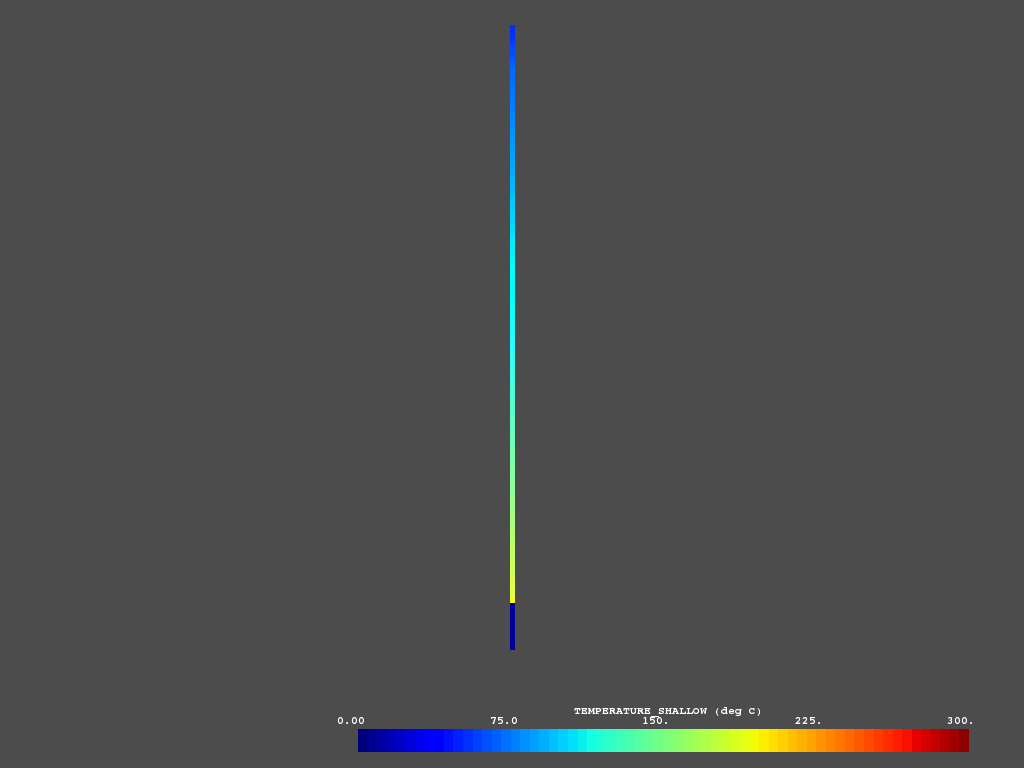

In [7]:
well_poly.set_active_scalar(' TEMPERATURE_SHALLOW (deg C)')
well_poly.plot(clim=[0,300])

In [8]:
WELLS['well_Acord1'] = well_poly
gdc19.save_well_db(WELLS)
WELLS

(MultiBlock)0x1175c9d08